#AQI Prediction Model using Python

In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn

<class 'OSError'>: Not available

In [2]:
import piplite
await piplite.install(["pandas", "numpy", "matplotlib", "seaborn"])
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv('Air Quality Data.csv')
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.shape

(29531, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.3+ MB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [8]:
df.dropna(subset=['AQI'], inplace = True)


In [9]:
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [10]:
df.shape

(24850, 16)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [12]:
null_value_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)


In [13]:
null_value_percentage

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
City           0.000000
Date           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

## Key Considerations
>Xylene has the highest percentage of missing values- 61.86%




>PM10 and NH3 28-26%


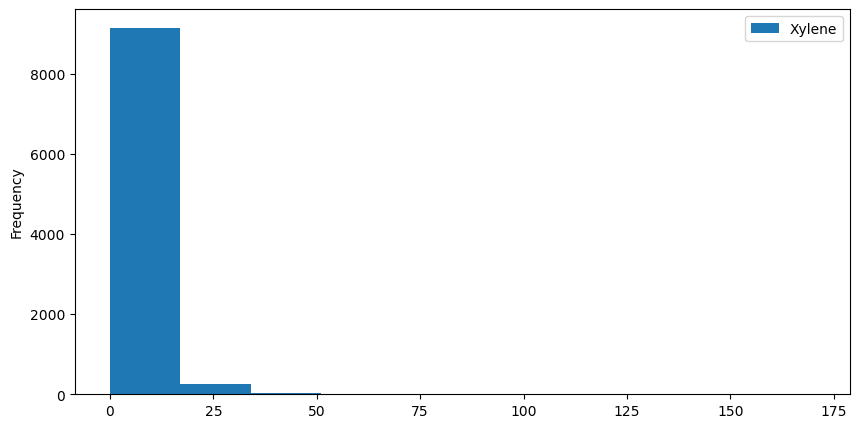

In [14]:
#Univariate values
df['Xylene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

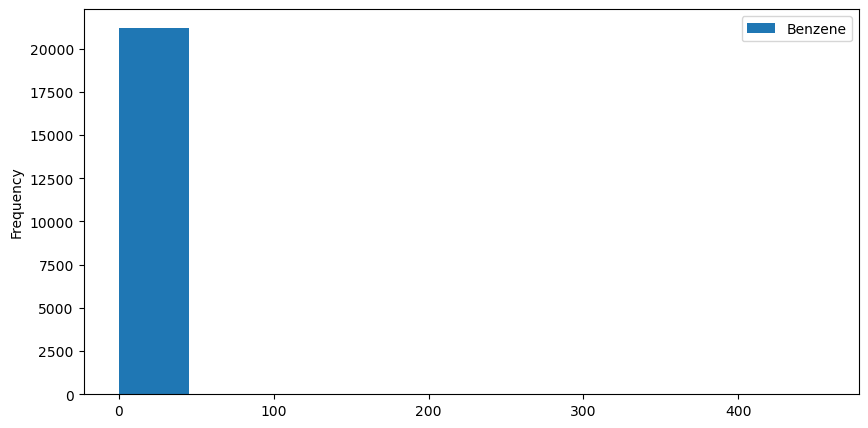

In [15]:
df['Benzene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

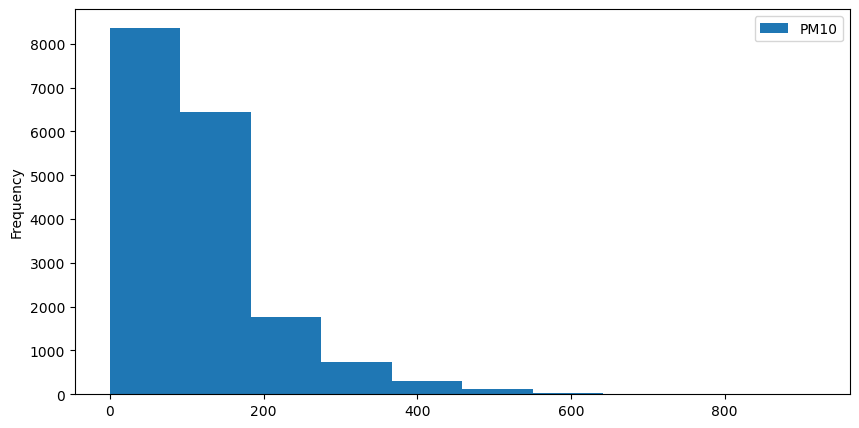

In [16]:
df['PM10'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

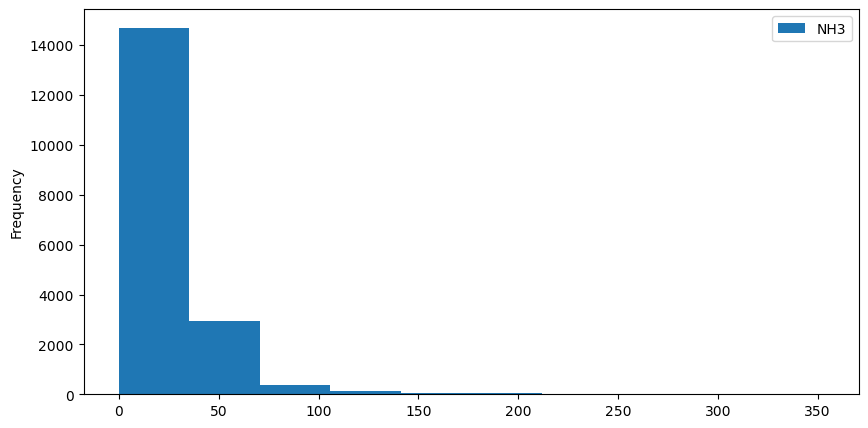

In [17]:
df['NH3'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

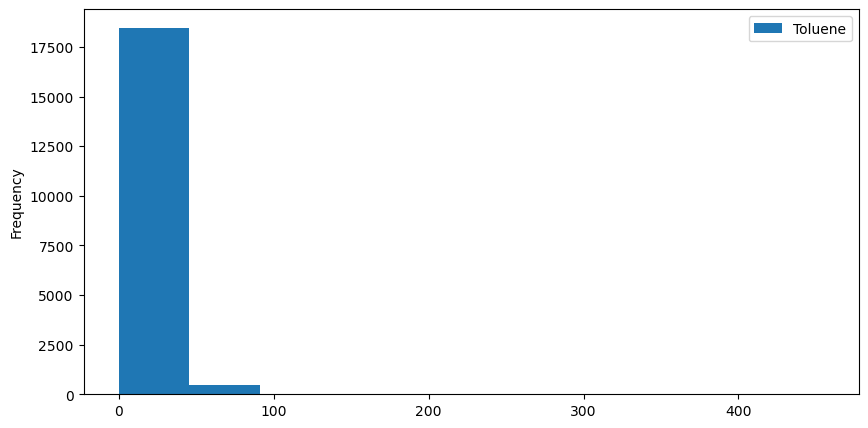

In [18]:
df['Toluene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

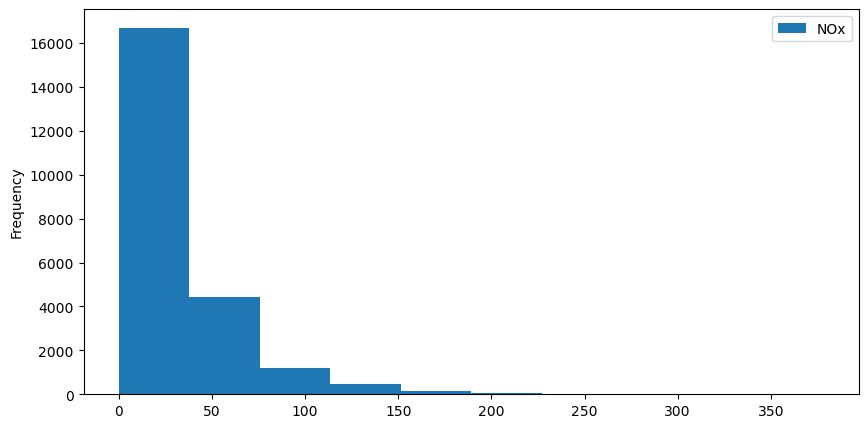

In [19]:
df['NOx'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

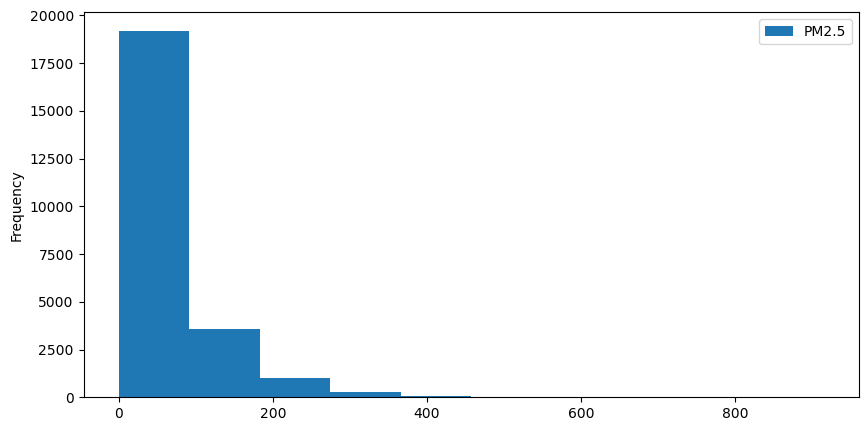

In [20]:
df['PM2.5'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

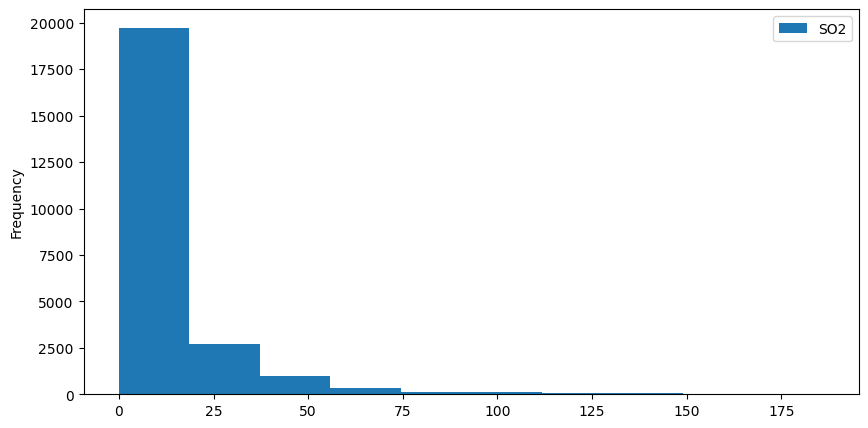

In [21]:
df['SO2'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

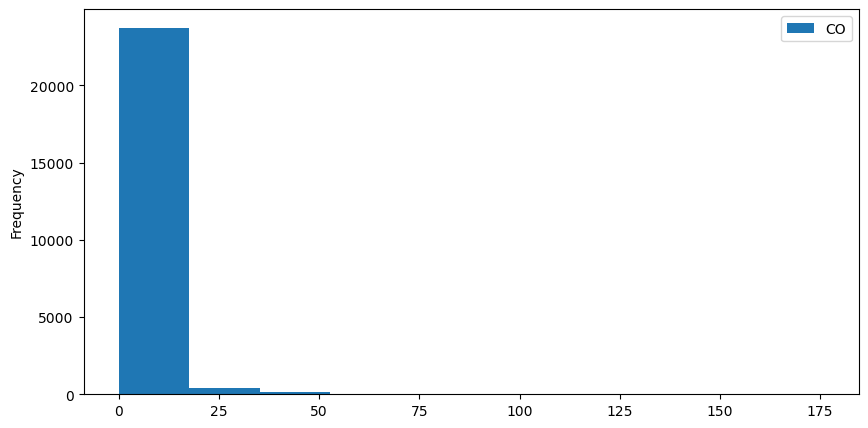

In [22]:
df['CO'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

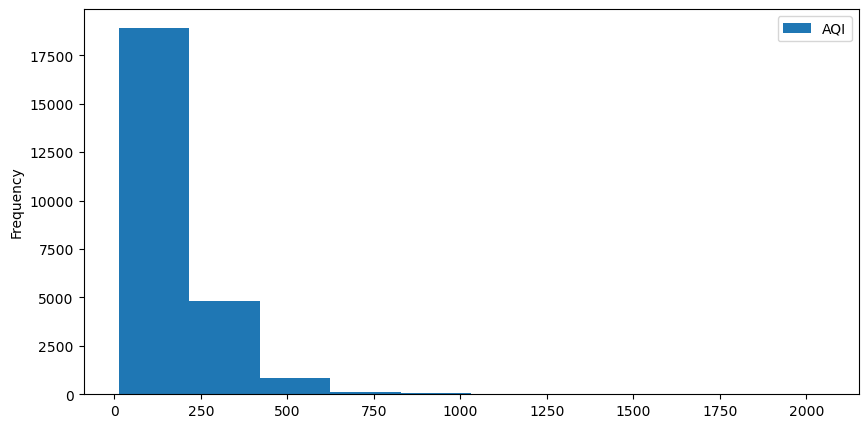

In [23]:
df['AQI'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

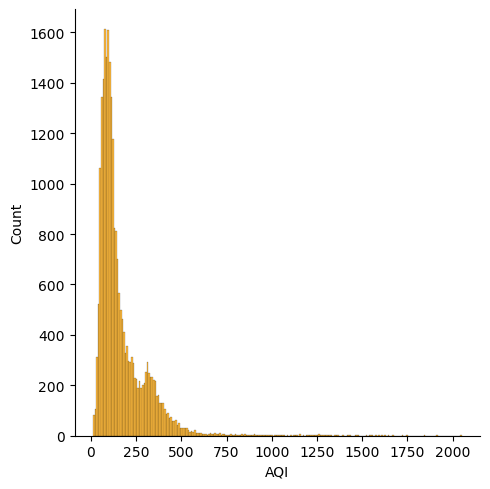

In [24]:
#Distribution of AQI from 2015 to 2020
sns.displot(df, x='AQI',color='orange')
plt.show()

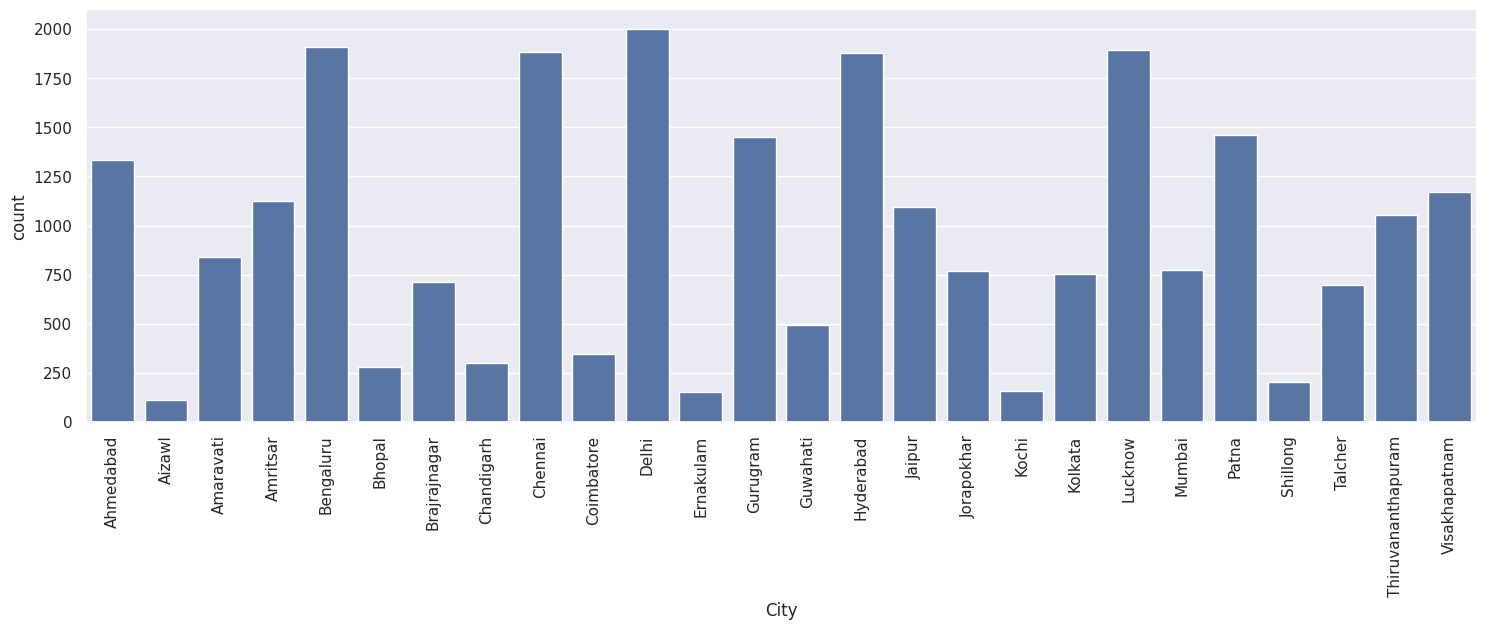

In [25]:
#Bivariate
sns.set_theme(style="darkgrid")
graph=sns.catplot(x="City",kind='count',data=df,height=5,aspect=3)
graph.set_xticklabels(rotation=90)

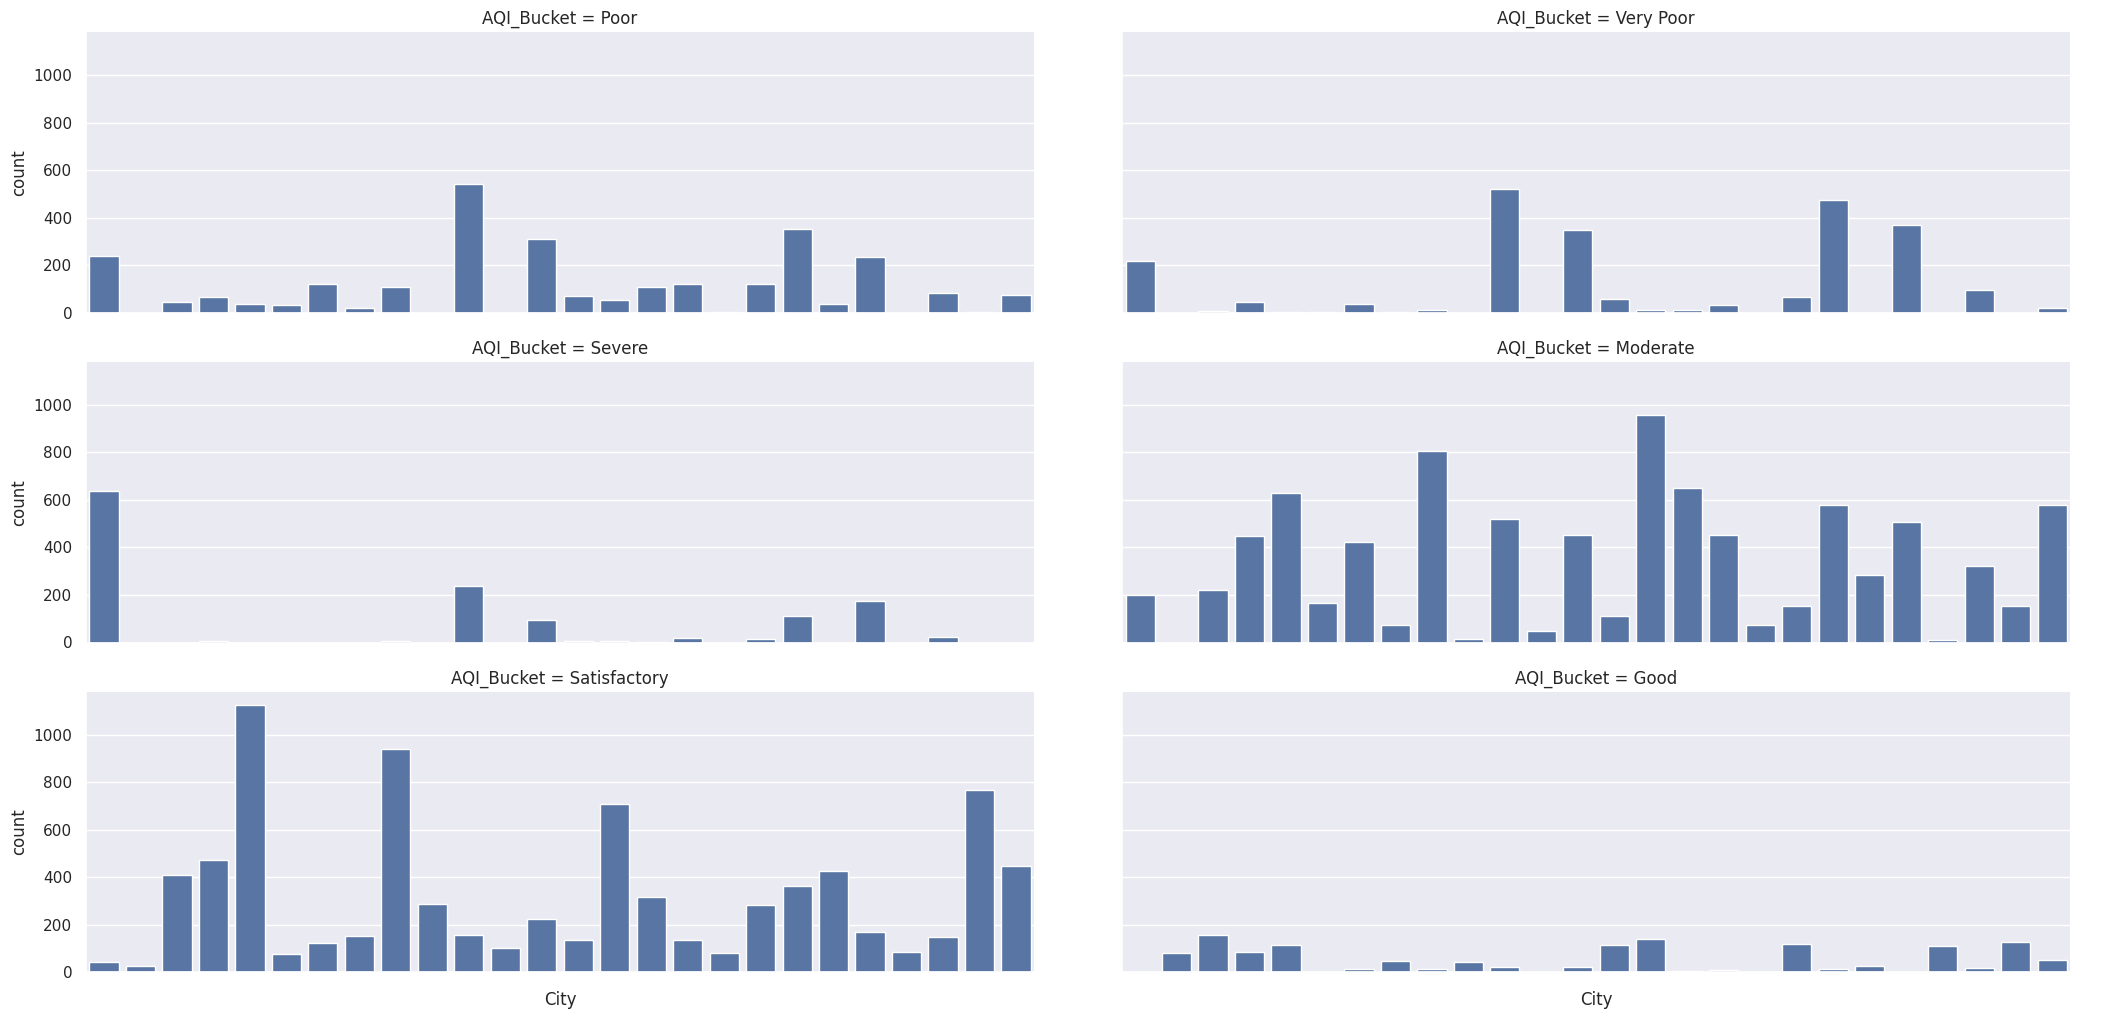

In [26]:
sns.set_theme(style="darkgrid")
graph=sns.catplot(x="City",kind='count',data=df,col="AQI_Bucket",col_wrap=2,height=3.5,aspect=3)
graph.set_xticklabels(rotation=90)

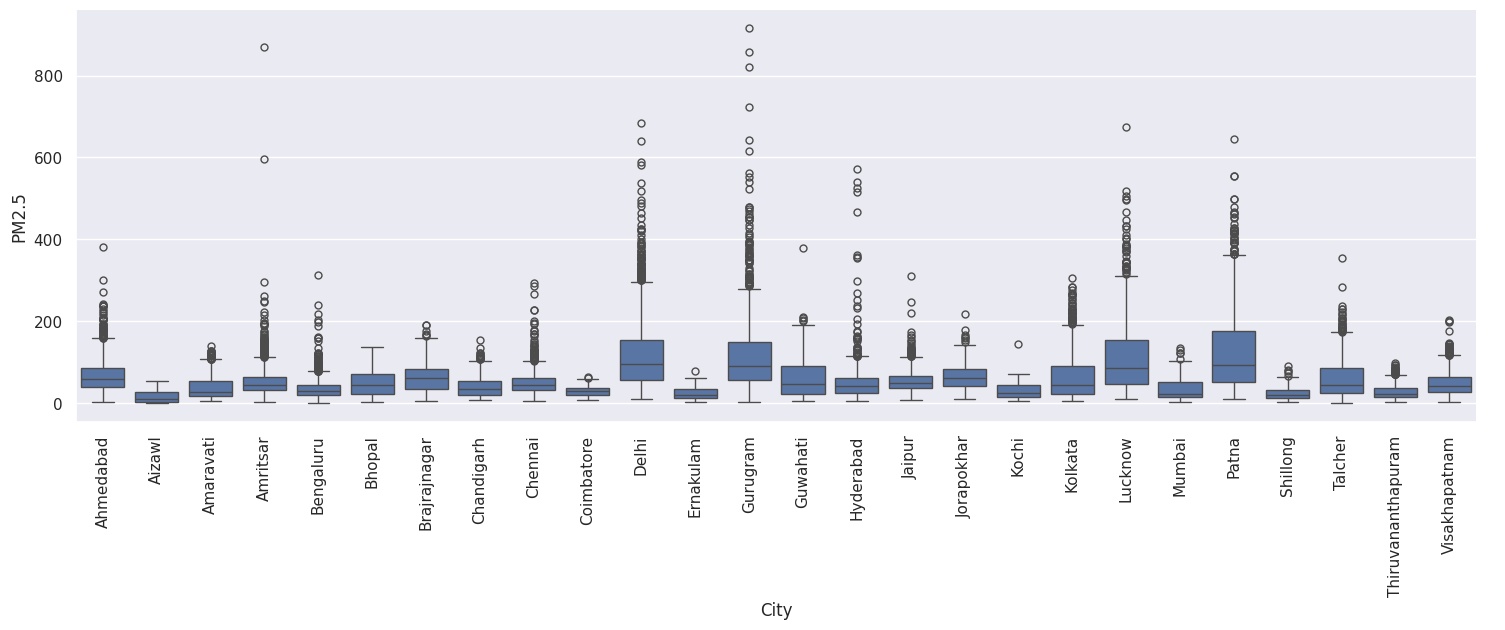

In [27]:
graph1=sns.catplot(x='City',y='PM2.5',kind='box',data=df,height=5,aspect=3)
graph1.set_xticklabels(rotation=90)

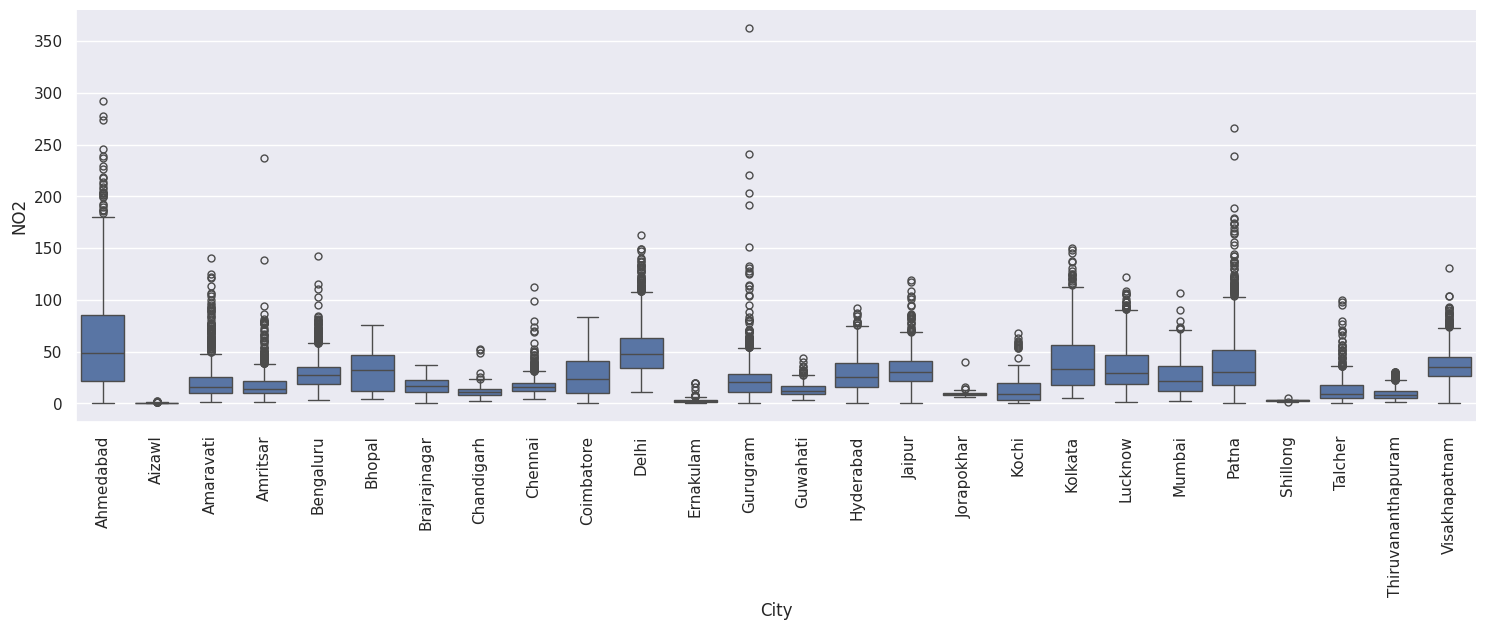

In [28]:
graph2=sns.catplot(x='City',y='NO2',kind='box',data=df,height=5,aspect=3)
graph2.set_xticklabels(rotation=90)

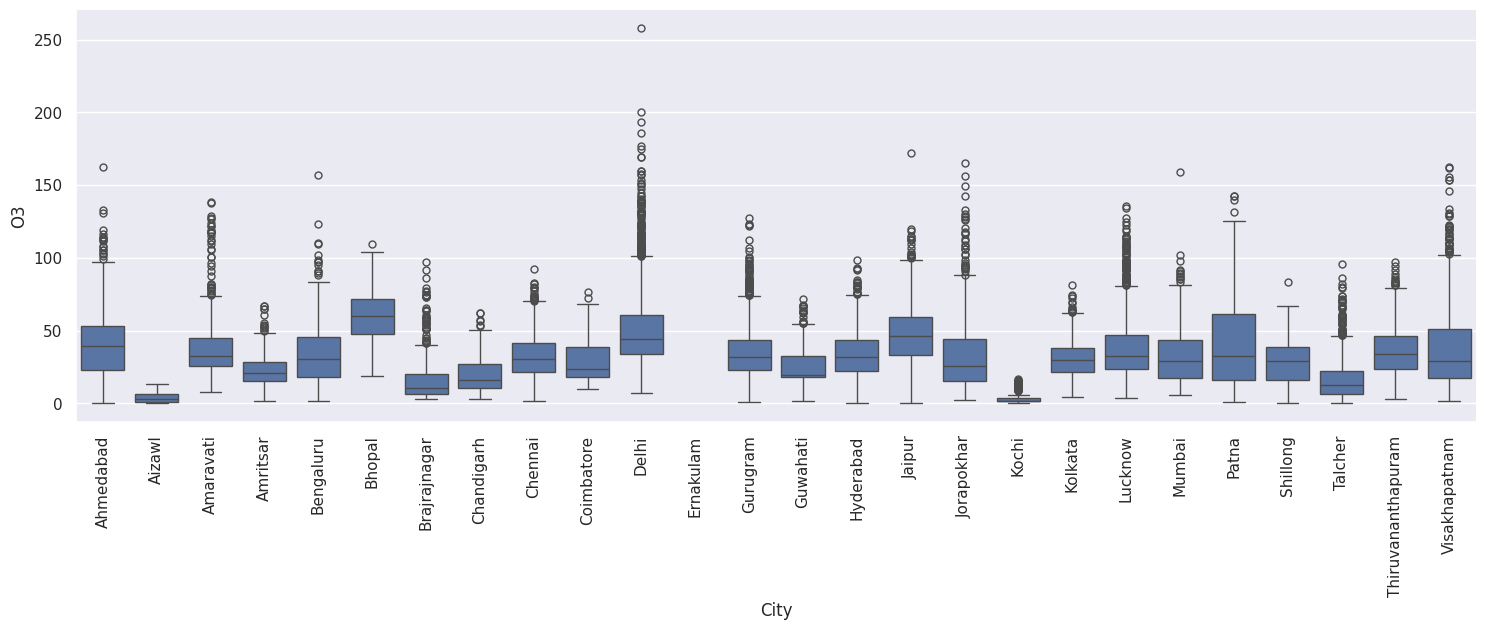

In [29]:
graph3=sns.catplot(x='City',y='O3',kind='box',data=df,height=5,aspect=3)
graph3.set_xticklabels(rotation=90)

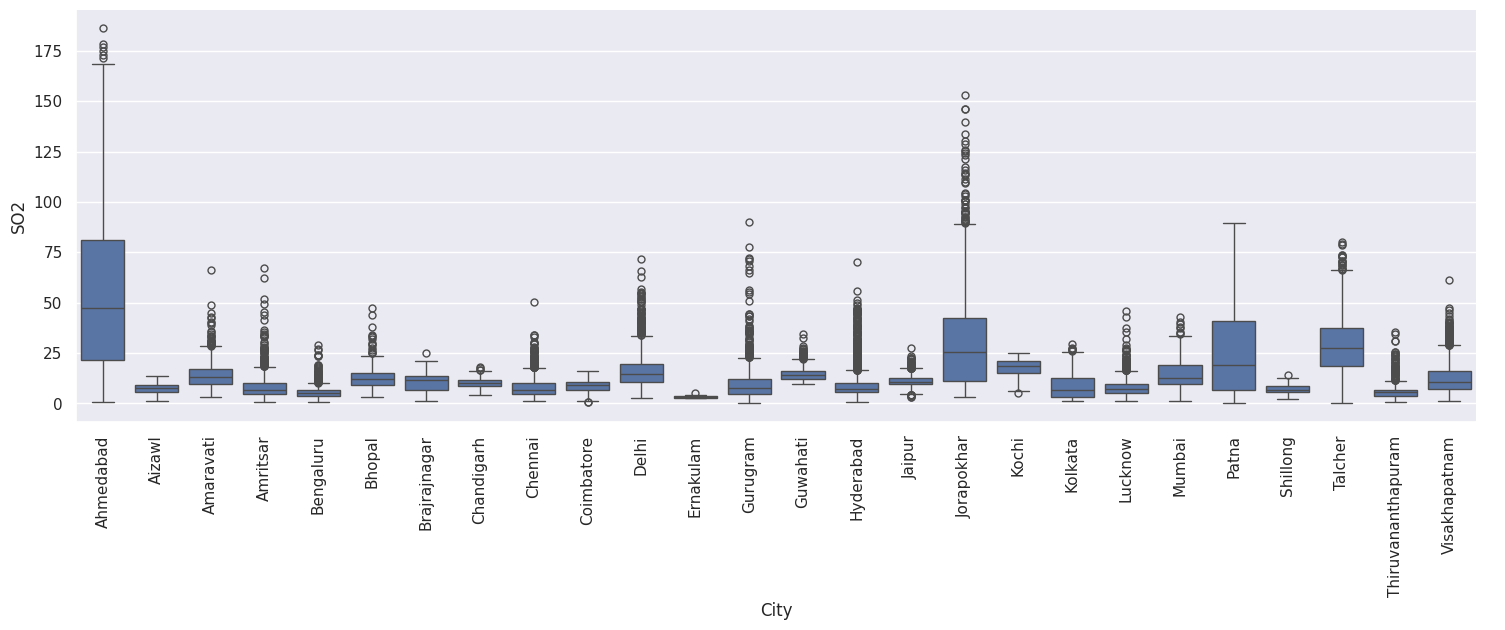

In [30]:
graph4=sns.catplot(x='City',y='SO2',kind='box',data=df,height=5,aspect=3)
graph4.set_xticklabels(rotation=90)

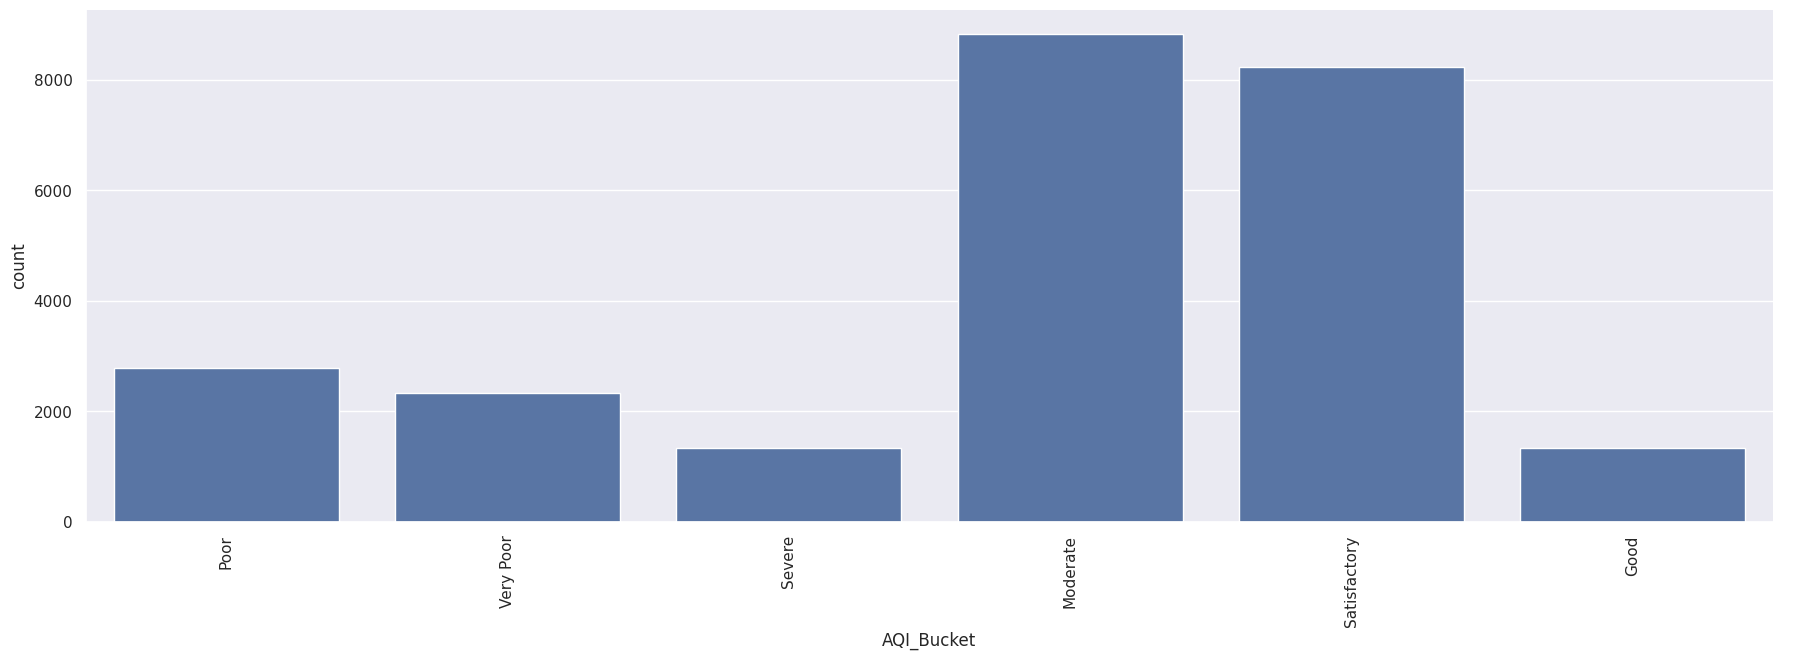

In [31]:
graph5=sns.catplot(x='AQI_Bucket',data=df,kind='count',height=6,aspect=3)
graph5.set_xticklabels(rotation=90)

In [32]:
#To check the null values
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [33]:
df.describe().loc['mean']

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [34]:
df=df.replace({
    "PM2.5":{np.nan:67.476613},
    "PM10":{np.nan:118.454435},
    "NO":{np.nan:17.622421},
    "NO2":{np.nan:28.978391},
    "NOx":{np.nan:32.289012},
    "NH3":{np.nan:23.848366},
    "CO":{np.nan:2.345267},
    "SO2":{np.nan:14.362933},
    "O3":{np.nan:34.912885},
    "Benzene":{np.nan:3.458668},
    "Toluene":{np.nan:9.525714},
    "Xylene":{np.nan:3.588683}
})

In [35]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [36]:
df=df.drop(['AQI_Bucket'],axis=1)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,29-01-2015,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,30-01-2015,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,31-01-2015,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,01-02-2015,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,02-02-2015,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


<Axes: >

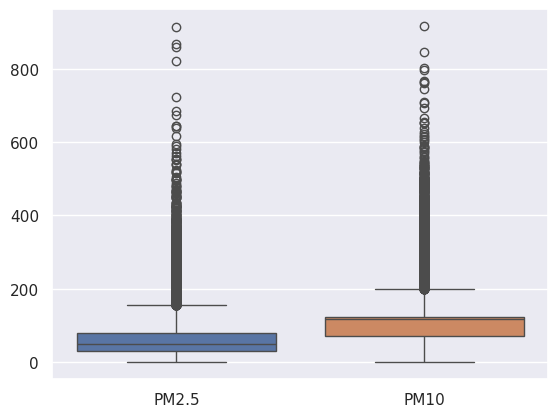

In [37]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

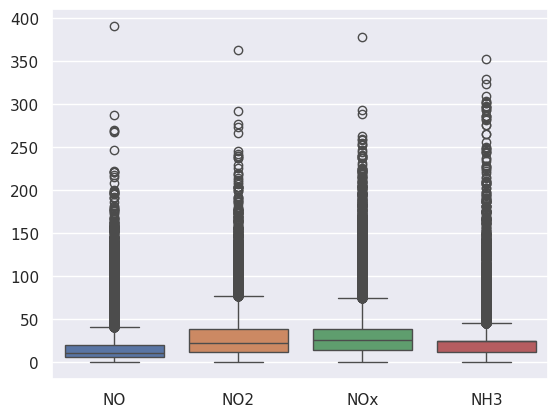

In [38]:
sns.boxplot(data=df[['NO','NO2','NOx','NH3',]])

<Axes: >

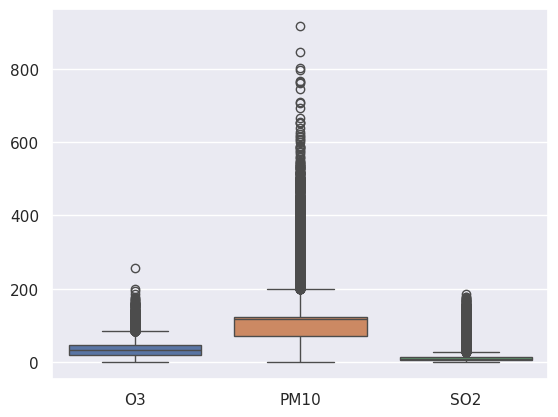

In [39]:
sns.boxplot(data=df[['O3','PM10','SO2']])

In [40]:
#IQR Method -q3 q1
def replace_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1=df[column].quantile(0.25)
        Q3=df[column].quntile(0.75)
        IQR=Q3-Q1
        lb=Q1-1.5*IQR
        ub=Q3+1.5*IQR
        df[column]=df[column].apply(
            lamda x: Q1 if x < lb else (Q3 if x > ub else x)
        )
        return df

<class 'SyntaxError'>: invalid syntax. Perhaps you forgot a comma? (<ipython-input-40-32e86b69abf7>, line 10)

In [41]:
df= replace_outliers(df)

<class 'NameError'>: name 'replace_outliers' is not defined

In [42]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000
mean,67.476613,118.454435,17.622421,28.978391,32.289012,23.848366,2.345267,14.362933,34.912885,3.458668,9.525714,3.588683,166.463581
std,62.208948,75.660357,22.245859,24.432532,29.542967,22.213762,7.011570,17.215217,21.368849,14.851646,18.269981,4.171218,140.696585
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.560000,71.780000,5.720000,12.090000,14.030000,11.280000,0.590000,5.790000,19.640000,0.340000,1.580000,2.650000,81.000000
50%,50.165000,118.454435,10.075000,22.535000,25.720000,23.848366,0.950000,9.430000,32.060000,1.810000,6.790000,3.588683,118.000000
75%,79.507500,122.957500,19.710000,37.910000,38.170000,24.710000,1.530000,14.890000,45.397500,3.458668,9.525714,3.588683,208.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000


<Axes: >

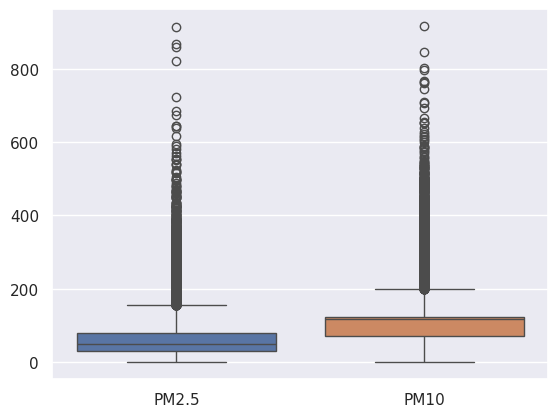

In [43]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

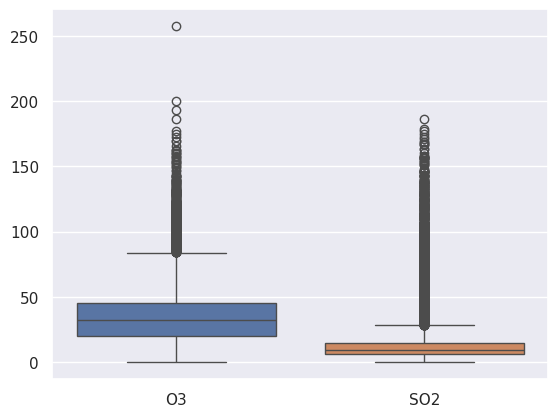

In [44]:
sns.boxplot(data=df[['O3','SO2']])

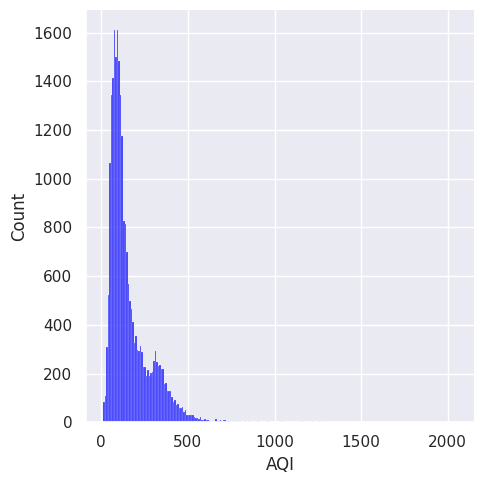

In [45]:
sns.displot(df,x='AQI',color='blue')

In [46]:
df1=df.drop(columns=['City'])

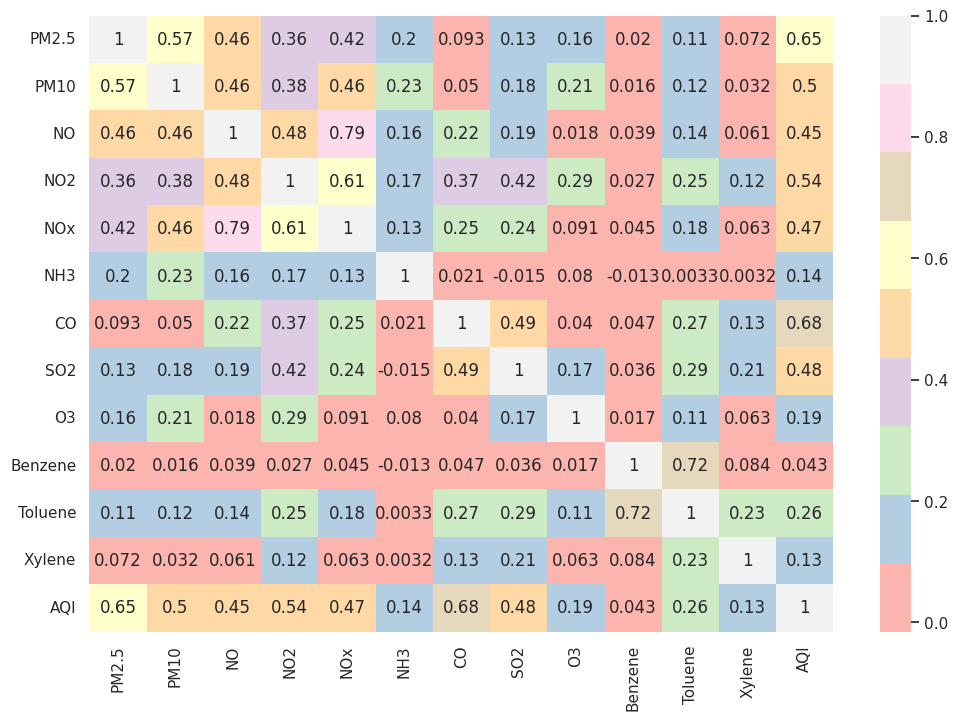

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = df.drop(columns=['City'], errors='ignore')  # Ignore if 'City' is not present
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert 'Date' column

df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='Pastel1')
plt.show()


# 
Week 3 - Data Modelling - 10th March 2025

In [48]:
import pandas as pd

df.columns = df.columns.str.strip()

columns_to_drop = ["Date", "City"]
existing_columns = [col for col in columns_to_drop if col in df.columns]

if existing_columns:
    df.drop(existing_columns, axis=1, inplace=True)

df.head()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


In [49]:
#Scaling - Standard Scaler
from sklearn.preprocessing import StandardScaler
df1 = StandardScaler().fit_transform(df)
df1

array([[ 2.51631030e-01, -3.54232328e-09, -4.80657363e-01, ...,
        -5.21396571e-01, -1.07568624e-01,  3.02333382e-01],
       [ 1.98743683e-01, -3.54232328e-09, -1.69581975e-01, ...,
        -5.21396571e-01,  2.92802152e-01,  1.14814207e+00],
       [ 4.34727347e-01, -3.54232328e-09,  3.04223602e-01, ...,
        -5.20849214e-01,  9.78467074e-01,  2.47016238e+00],
       ...,
       [-7.16416399e-01, -6.96870835e-01, -6.37094119e-01, ...,
        -5.20849214e-01, -8.60361580e-01, -6.99843302e-01],
       [-8.17207787e-01, -9.05174334e-01, -6.10122264e-01, ...,
        -5.21396571e-01, -8.60361580e-01, -7.99350207e-01],
       [-8.43571085e-01, -6.93302183e-01, -7.74201046e-01, ...,
         6.90749062e-09, -2.43698499e-08, -8.27780751e-01]])

In [50]:
df= pd.DataFrame(df1,columns=df.columns)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.251631,-3.542323e-09,-0.480657,-0.010985,0.048438,-9.195637e-09,0.653894,2.042250,1.162796,-0.231539,-0.521397,-0.107569,0.302333
1,0.198744,-3.542323e-09,-0.169582,-0.012213,0.297572,-9.195637e-09,1.640854,1.982418,2.908831,-0.230192,-0.521397,0.292802,1.148142
2,0.434727,-3.542323e-09,0.304224,0.150688,0.687859,-9.195637e-09,3.144114,3.080306,3.576171,-0.216726,-0.520849,0.978467,2.470162
3,1.101365,-3.542323e-09,1.162378,0.536247,1.769695,-9.195637e-09,5.866812,3.535726,3.172304,-0.205952,-0.519207,5.341789,4.375009
4,1.781988,-3.542323e-09,1.660458,0.259152,1.371284,-9.195637e-09,7.447089,2.362903,3.391319,-0.201912,-0.518112,7.676886,5.313217


In [51]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [53]:
#Feature & Target Selection
X = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
y = df['AQI']


In [54]:
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,0.251631,-3.542323e-09,-0.480657,-0.010985,0.048438,-9.195637e-09,0.653894,2.042250,1.162796,-0.231539,-0.521397,-0.107569
1,0.198744,-3.542323e-09,-0.169582,-0.012213,0.297572,-9.195637e-09,1.640854,1.982418,2.908831,-0.230192,-0.521397,0.292802
2,0.434727,-3.542323e-09,0.304224,0.150688,0.687859,-9.195637e-09,3.144114,3.080306,3.576171,-0.216726,-0.520849,0.978467
3,1.101365,-3.542323e-09,1.162378,0.536247,1.769695,-9.195637e-09,5.866812,3.535726,3.172304,-0.205952,-0.519207,5.341789
4,1.781988,-3.542323e-09,1.660458,0.259152,1.371284,-9.195637e-09,7.447089,2.362903,3.391319,-0.201912,-0.518112,7.676886


In [55]:
# Split the Data into training data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print('Shape of X Train',X_train.shape)
print('Shape of X test',X_test.shape)
print('Shape of y Train',y_train.shape)
print('Shape of y Test',X_test.shape)

Shape of X Train (19880, 12)
Shape of X test (4970, 12)
Shape of y Train (19880,)
Shape of y Test (4970, 12)


In [56]:
#LR Model
LR=LinearRegression()
LR.fit(X_train,y_train)


LinearRegression()

In [57]:
#Predicting the values
train_pred=LR.predict(X_train)
test_pred=LR.predict(X_test)

In [58]:
#Evaluating for LR
RMSE_train=(np.sqrt(mean_squared_error(y_train,train_pred)))
RMSE_test= (np.sqrt(mean_squared_error(y_test,test_pred)))
print('RMSE Training Data = ',str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'*60)
print('R squared value for train = ', LR.score(X_train,y_train))
print('R squared value on test = ', LR.score(X_test,y_test))

RMSE Training Data =  0.3794259609503449
RMSE Test Data =  0.42012072213043006
____________________________________________________________
R squared value for train =  0.8586796094522202
R squared value on test =  0.8091969650802101


In [59]:
#KNN 
knn= KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [60]:
#Predicting the values:
train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))

print('RMSE Training Data =', RMSE_train)
print('RMSE Test Data =', RMSE_test)
print('_' * 60)

print('R squared value for train =', knn.score(X_train, y_train))
print('R squared value on test =', knn.score(X_test, y_test))


RMSE Training Data = 0.27921576490757766
RMSE Test Data = 0.3389559890046965
____________________________________________________________
R squared value for train = 0.9234701936223646
R squared value on test = 0.8757993995597143


In [61]:
#Decision Tree
dtr= DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [62]:
train_pred = dtr.predict(X_train)
test_pred = dtr.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))

print('RMSE Training Data =', RMSE_train)
print('RMSE Test Data =', RMSE_test)
print('_' * 60)

print('R squared value for train =', dtr.score(X_train, y_train))
print('R squared value on test =', dtr.score(X_test, y_test))


RMSE Training Data = 0.021678786736224087
RMSE Test Data = 0.39243750968610125
____________________________________________________________
R squared value for train = 0.9995386604479184
R squared value on test = 0.8335138562814199


In [65]:
#Random Forest Regressor 
rfr= RandomForestRegressor()
rfr.fit(X_train,y_train)


RandomForestRegressor()

In [66]:
train_pred = rfr.predict(X_train)
test_pred = rfr.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))

print('RMSE Training Data =', RMSE_train)
print('RMSE Test Data =', RMSE_test)
print('_' * 60)

print('R squared value for train =', rfr.score(X_train, y_train))
print('R squared value on test =', rfr.score(X_test, y_test))


RMSE Training Data = 0.11985339516517979
RMSE Test Data = 0.28663576190511525
____________________________________________________________
R squared value for train = 0.9858989508708391
R squared value on test = 0.911182648307188
